# Logistic回归分类

在分类问题中，你要预测的变量 y是离散的值，我们将学习一种叫做逻辑回归(Logistic Regression)的算法，这是目前最流行使用最广泛的一种学习算法。

## 概述

Logistic回归是一种简单的分类算法，提到“回归”，很多人可能觉得与分类没什么关系，Logistic回归通过对数据分类边界的拟合来实现分类。而“回归”也就意味着最佳拟合。要进行最佳拟合，则需要寻找到最佳的拟合参数，一些最优化方法就可以用于最佳回归系数的确定。

## Sigmoid函数

单位阶跃函数（或者称为海维塞德阶跃函数）：在二分问题下，函数的输出类别是0和1，Simoid函数就是属于这种函数<br>
其函数表达式为：$\sigma(z) = \frac{1}{1+e^{-z}}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

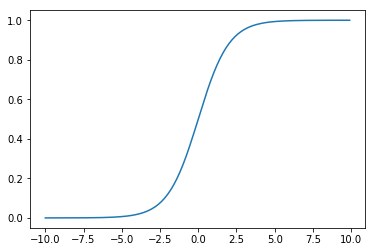

In [4]:
x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)

## 决策边界(Decison Boundary)

所谓的决策边界，就是将所有数据点进行分类的边界。这个概念能更好的帮助我们立即逻辑回归的假设函数在做什么，而决策边界的目的就是要把属于不同类别的部分以最精确的方式区分开。

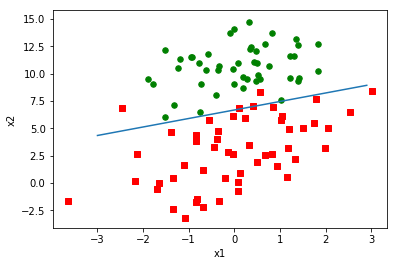

In [28]:
# 加载数据
def loadDataSet():
    feature = []
    label = []
    fp = open('testSet.txt')
    for line in fp.readlines():
        lineArr = line.strip().split("\t") #每行按\t分割  
        feature.append( [1.0, float(lineArr[0]), float(lineArr[1])])  
        label.append(float(lineArr[2]))
    return np.array(feature), np.array(label)

# 梯度上升
def gradAscent(x, y):
    m, n = np.shape(x)
    alpha = 0.001      #初始化 alpha的值  
    maxCycles = 500    #最大迭代次数  
    w = np.ones((n,1)) #初始化最佳回归系数 
    b = 1.0
    for i in range(maxCycles):
        h = sigmoid(x.dot(w))
        error = y - h.T
        w = w + alpha * x.T.dot(error.T)
    return w

def plotBestFit(w,data_x,label_y):  
    import matplotlib.pyplot as plt  
    m, n = np.shape(data_x)
    xcord1 = [];ycord1=[]  
    xcord2 = [];ycord2=[]  
  
    for i in range(m):  
        if int(label_y[i])==1:  
            xcord1.append(data_x[i,1])  
            ycord1.append(data_x[i,2])  
        else:  
            xcord2.append(data_x[i,1])  
            ycord2.append(data_x[i,2])  
  
    fig = plt.figure()  
    ax = fig.add_subplot(111)  
    ax.scatter(xcord1,ycord1,s=30,c='red', marker='s')  
    ax.scatter(xcord2,ycord2,s=30,c="green")  
    x = np.arange(-3.0,3.0,0.1)  
    y = (-w[0] - w[1] * x) / w[2]
    ax.plot(x,y)  
    plt.xlabel("x1")     #X轴的标签  
    plt.ylabel("x2")     #Y轴的标签  
    plt.show()  

x, y = loadDataSet()
w = gradAscent(x, y)
plotBestFit(w, x, y)

## 代价函数(Cost Function)